<a href="https://colab.research.google.com/github/UdenalR/cell_phone_pricing_machine_learning_collab/blob/main/cell_phone_pricing_machine_learning_collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
import numpy as np

In [7]:
# Load the dataset
data = pd.read_csv('train.csv')

In [8]:
# Rename columns in English for better understanding
data.columns = ['battery_power', 'has_bluetooth', 'clock_speed', 'dual_sim', 'front_camera',
                'has_4g', 'internal_memory', 'mobile_depth', 'mobile_weight', 'num_cores',
                'primary_camera', 'pixel_height', 'pixel_width', 'ram', 'screen_height',
                'screen_width', 'talk_time', 'has_3g', 'has_touch_screen', 'has_wifi', 'price_range']

In [9]:
# Create new columns for analysis
data['pixel_density'] = (data['pixel_height'] * data['pixel_width']) / (data['screen_height'] * data['screen_width'])
data['ram_storage_ratio'] = data['ram'] / (data['internal_memory'] * 1024)  # Converting from MB to GB
data['front_camera_ratio'] = data['front_camera'] / (data['front_camera'] + data['primary_camera'])
data['connectivity_index'] = data['has_bluetooth'] + data['has_4g'] + data['has_3g'] + data['has_wifi']

In [10]:
# Set plotting style to dark background
plt.style.use('dark_background')

In [11]:
# Define a custom color palette
custom_palette = ['#CD5C5C', '#A52A2A', '#8B0000', '#800000']

<ipython-input-41-d0e262326db4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price_range', y='battery_power', data=data, palette=custom_palette)


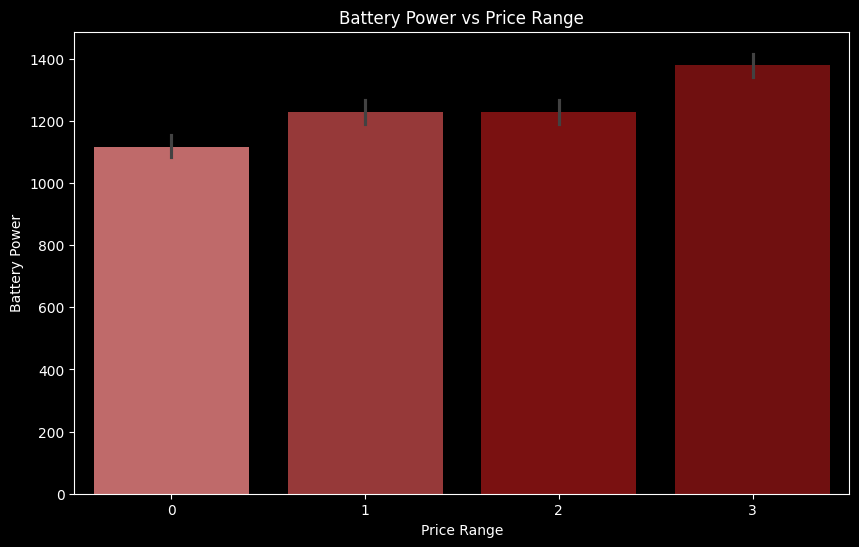

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-41-d0e262326db4>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price_range', y='ram', data=data, palette=custom_palette)


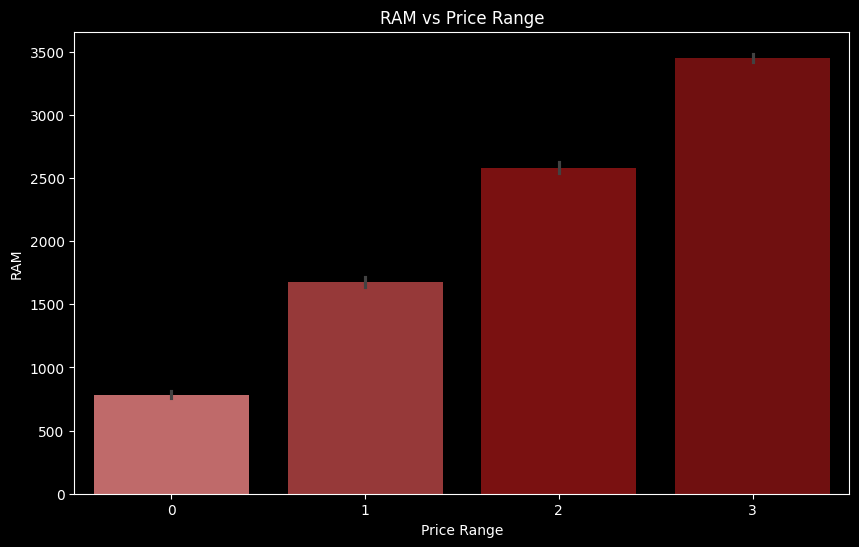

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
# Bar plots for feature analysis
plt.figure(figsize=(10, 6))
sns.barplot(x='price_range', y='battery_power', data=data, palette=custom_palette)
plt.title('Battery Power vs Price Range', color='white')
plt.xlabel('Price Range', color='white')
plt.ylabel('Battery Power', color='white')
plt.savefig('battery_power_vs_price_range.png')
plt.show()
files.download('battery_power_vs_price_range.png')

plt.figure(figsize=(10, 6))
sns.barplot(x='price_range', y='ram', data=data, palette=custom_palette)
plt.title('RAM vs Price Range', color='white')
plt.xlabel('Price Range', color='white')
plt.ylabel('RAM', color='white')
plt.savefig('ram_vs_price_range.png')
plt.show()
files.download('ram_vs_price_range.png')


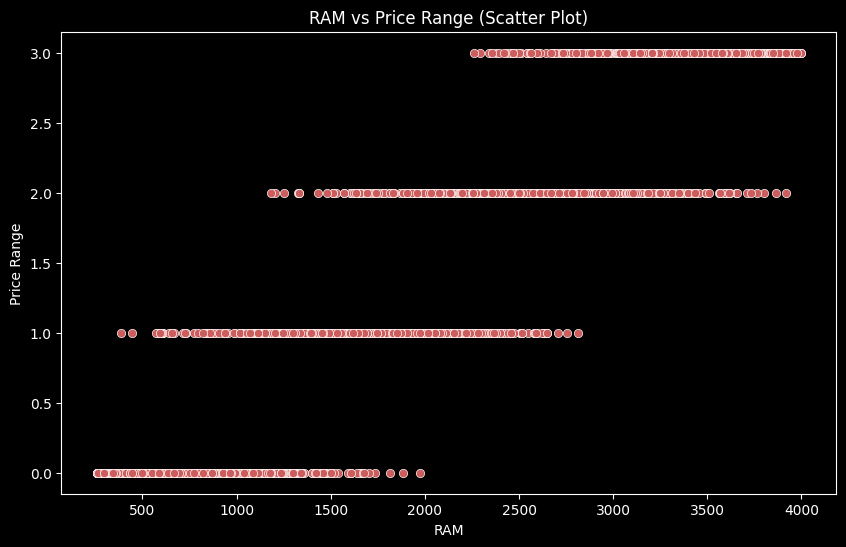

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
# Scatter plot for RAM vs Price Range
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ram', y='price_range', data=data, color='#CD5C5C')
plt.title('RAM vs Price Range (Scatter Plot)')
plt.xlabel('RAM')
plt.ylabel('Price Range')
plt.savefig('ram_vs_price_range_scatter.png')
plt.show()
files.download('ram_vs_price_range_scatter.png')


<ipython-input-43-92806e3f0416>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='price_range', data=data, palette=custom_palette)


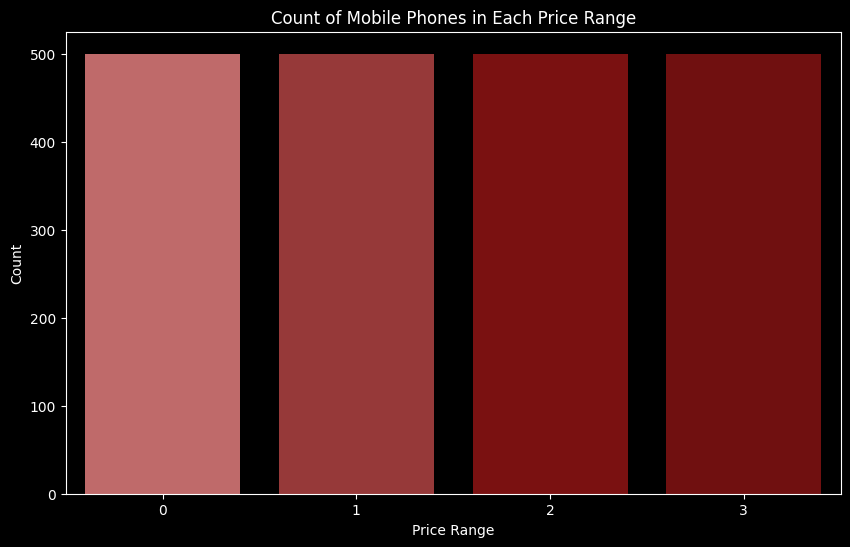

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [43]:
# Count plot for counting mobile phones in each price range
plt.figure(figsize=(10, 6))
sns.countplot(x='price_range', data=data, palette=custom_palette)
plt.title('Count of Mobile Phones in Each Price Range', color='white')
plt.xlabel('Price Range', color='white')
plt.ylabel('Count', color='white')
plt.savefig('count_of_mobile_phones_in_each_price_range.png')
plt.show()
files.download('count_of_mobile_phones_in_each_price_range.png')

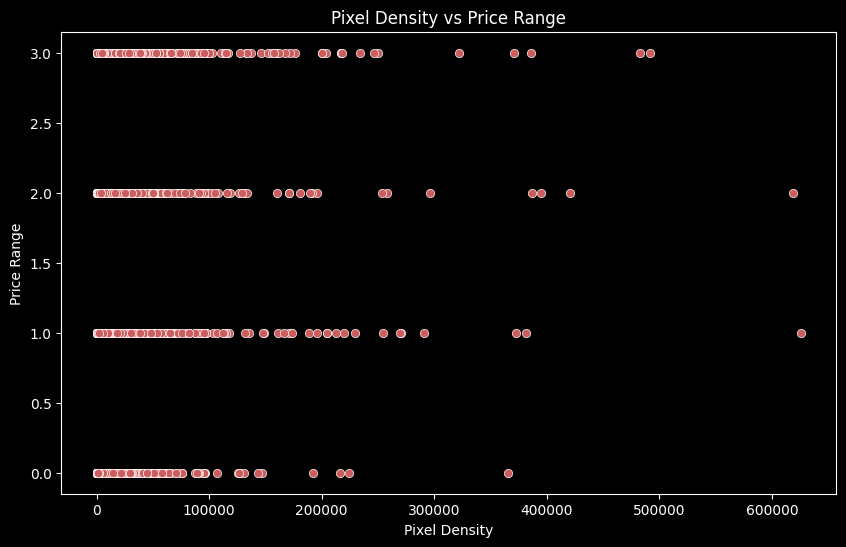

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

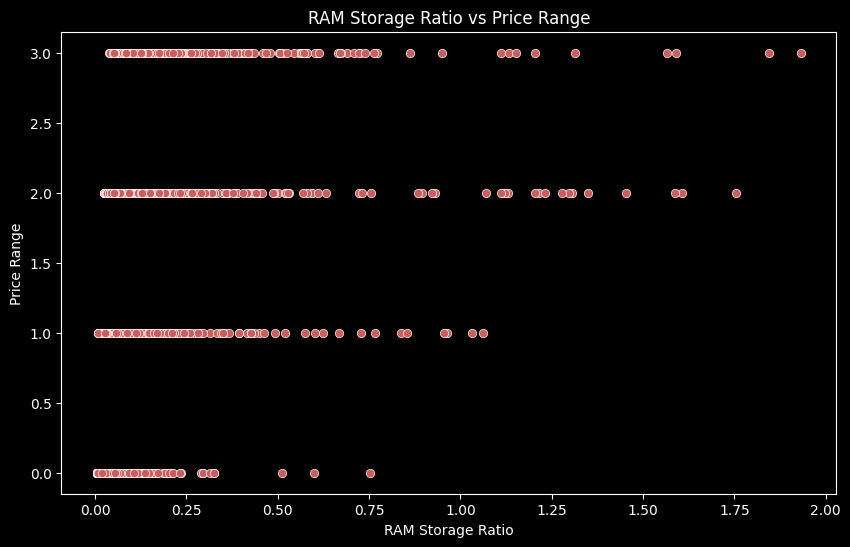

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

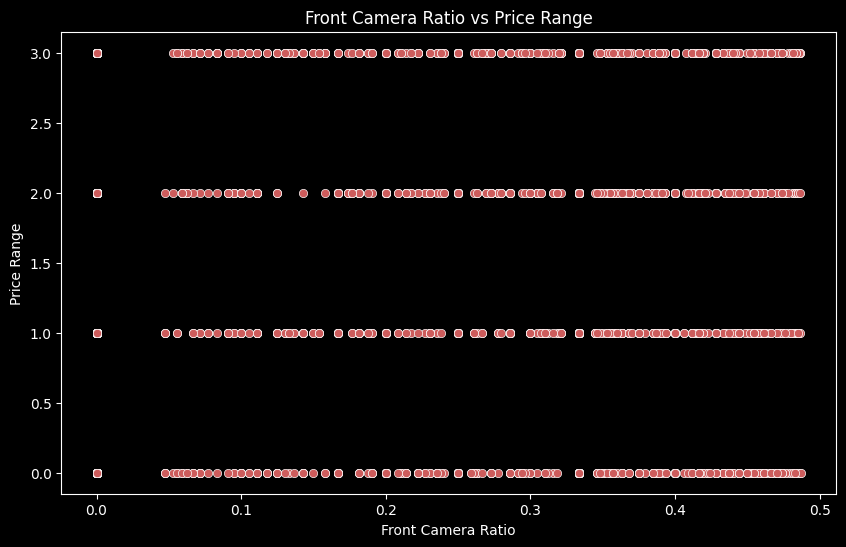

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

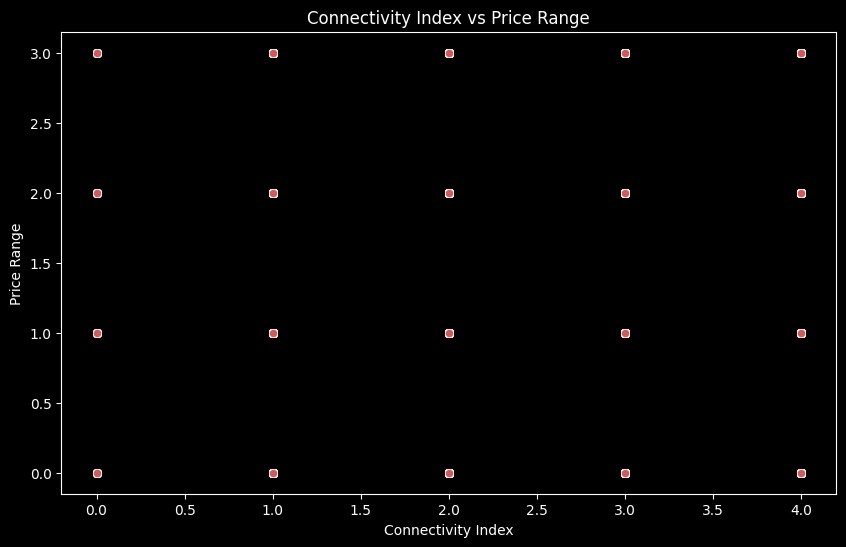

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
# Scatter plots for other features vs Price Range
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pixel_density', y='price_range', data=data, color='#CD5C5C')
plt.title('Pixel Density vs Price Range')
plt.xlabel('Pixel Density')
plt.ylabel('Price Range')
plt.savefig('pixel_density_vs_price_range_scatter.png')
plt.show()
files.download('pixel_density_vs_price_range_scatter.png')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='ram_storage_ratio', y='price_range', data=data, color='#CD5C5C')
plt.title('RAM Storage Ratio vs Price Range')
plt.xlabel('RAM Storage Ratio')
plt.ylabel('Price Range')
plt.savefig('ram_storage_ratio_vs_price_range_scatter.png')
plt.show()
files.download('ram_storage_ratio_vs_price_range_scatter.png')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='front_camera_ratio', y='price_range', data=data, color='#CD5C5C')
plt.title('Front Camera Ratio vs Price Range')
plt.xlabel('Front Camera Ratio')
plt.ylabel('Price Range')
plt.savefig('front_camera_ratio_vs_price_range_scatter.png')
plt.show()
files.download('front_camera_ratio_vs_price_range_scatter.png')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='connectivity_index', y='price_range', data=data, color='#CD5C5C')
plt.title('Connectivity Index vs Price Range')
plt.xlabel('Connectivity Index')
plt.ylabel('Price Range')
plt.savefig('connectivity_index_vs_price_range_scatter.png')
plt.show()
files.download('connectivity_index_vs_price_range_scatter.png')

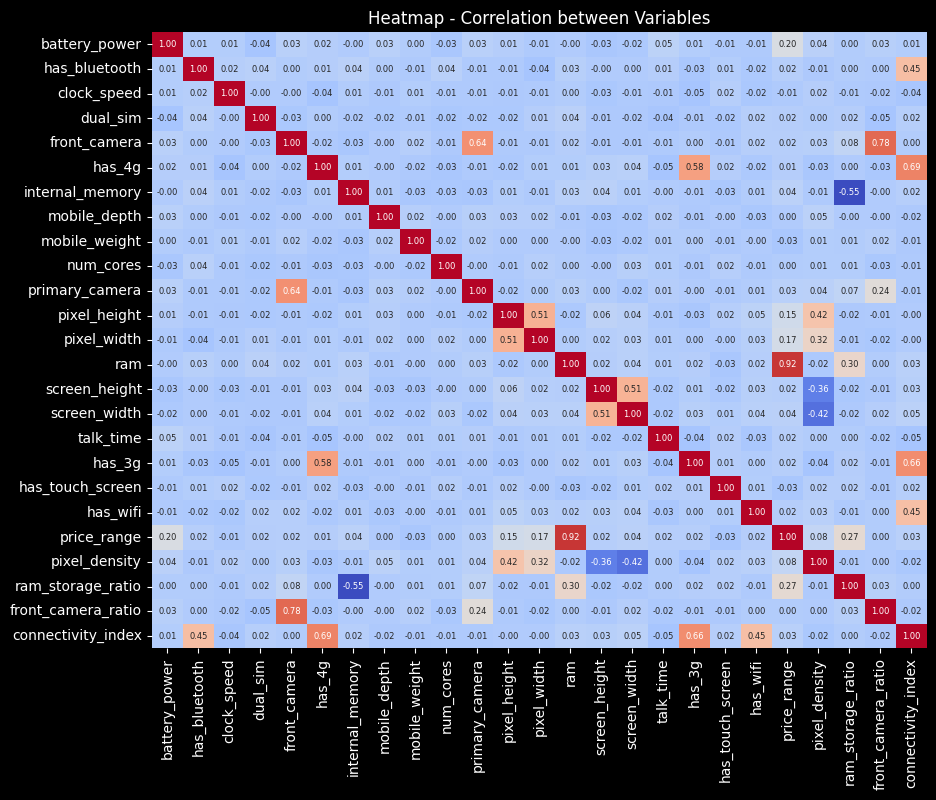

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
# Heatmap to visualize the correlation between variables
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={'fontsize': 6}, cbar=False)
plt.title('Heatmap - Correlation between Variables', color='white')
plt.savefig('heatmap_correlation_between_variables.png')
plt.show()
files.download('heatmap_correlation_between_variables.png')

In [17]:
# Define the custom colors for the palette
custom_palette2 = [
    '#660000', '#730000', '#800000', '#8D0000', '#990000', '#A60000',
    '#B30000', '#BF0000', '#CC0000', '#D90000', '#E60000', '#F20000',
    '#FF0000', '#FF1414', '#FF2929', '#FF3D3D', '#FF5252', '#FF6666',
    '#FF7A7A', '#FF8F8F', '#FFA3A3', '#FFB8B8', '#FFCCCC', '#FFE0E0',
    '#FFFFFF'
]

In [18]:
# Create training and test sets
X = data.drop('price_range', axis=1)
y = data['price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Handle infinite and very large values in X_train
X_train = X_train.replace([np.inf, -np.inf], np.nan)

In [20]:
# Handle infinite and very large values in X_test
X_test = X_test.replace([np.inf, -np.inf], np.nan)

In [21]:
# Create a SimpleImputer object to handle null values
imputer = SimpleImputer(strategy='mean')

In [22]:
# Fit the imputer to training data and transform training and test data
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

In [23]:
# Create and train the logistic regression model
logistic_model = LogisticRegression(max_iter=2000, solver='saga')
logistic_model.fit(X_train_imputed, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=2000, solver='saga')

In [24]:
# Predict using logistic regression
y_pred_logistic = logistic_model.predict(X_test_imputed)

In [25]:
# Calculate accuracy and display classification report
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f'Logistic Regression - Accuracy: {accuracy_logistic:.4f}')
print(classification_report(y_test, y_pred_logistic))

Logistic Regression - Accuracy: 0.5450
              precision    recall  f1-score   support

           0       0.78      0.71      0.75       105
           1       0.44      0.37      0.40        91
           2       0.34      0.16      0.22        92
           3       0.52      0.84      0.64       112

    accuracy                           0.55       400
   macro avg       0.52      0.52      0.50       400
weighted avg       0.53      0.55      0.52       400



In [26]:
# Get feature importance from logistic regression model
logistic_feature_importance = np.abs(logistic_model.coef_[0])

In [27]:
# Create a DataFrame for logistic regression feature importance
logistic_feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': logistic_feature_importance})
logistic_feature_importance_df = logistic_feature_importance_df.sort_values(by='Importance', ascending=False)

<ipython-input-46-86445c7f37ad>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=logistic_feature_importance_df, palette=custom_palette2)
<ipython-input-46-86445c7f37ad>:3: UserWarning: The palette list has more values (25) than needed (24), which may not be intended.
  sns.barplot(x='Importance', y='Feature', data=logistic_feature_importance_df, palette=custom_palette2)


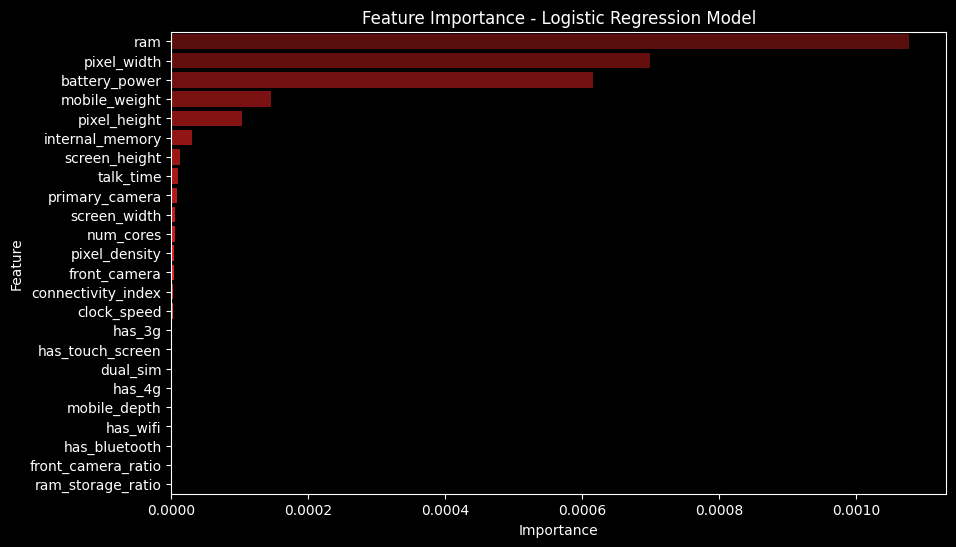

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [46]:
# Plot bar chart for logistic regression feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=logistic_feature_importance_df, palette=custom_palette2)
plt.title('Feature Importance - Logistic Regression Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig('feature_importance_logistic_regression.png')
plt.show()
files.download('feature_importance_logistic_regression.png')

In [29]:
# Create and train decision tree classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_imputed, y_train)

DecisionTreeClassifier(random_state=42)

In [30]:
# Predict using decision tree classifier
y_pred_decision_tree = decision_tree_model.predict(X_test_imputed)

In [31]:
# Calculate accuracy and display classification report for decision tree classifier
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print(f'\nDecision Tree - Accuracy: {accuracy_decision_tree:.4f}')
print(classification_report(y_test, y_pred_decision_tree))


Decision Tree - Accuracy: 0.8150
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       105
           1       0.71      0.76      0.73        91
           2       0.72      0.76      0.74        92
           3       0.91      0.88      0.89       112

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.82      0.81      0.82       400



In [32]:
# Get feature importance from decision tree model
decision_tree_feature_importance = decision_tree_model.feature_importances_

In [33]:
# Create a DataFrame for decision tree feature importance
decision_tree_feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': decision_tree_feature_importance})
decision_tree_feature_importance_df = decision_tree_feature_importance_df.sort_values(by='Importance', ascending=False)

<ipython-input-47-ab44c3316606>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=decision_tree_feature_importance_df, palette=custom_palette2)
<ipython-input-47-ab44c3316606>:3: UserWarning: The palette list has more values (25) than needed (24), which may not be intended.
  sns.barplot(x='Importance', y='Feature', data=decision_tree_feature_importance_df, palette=custom_palette2)


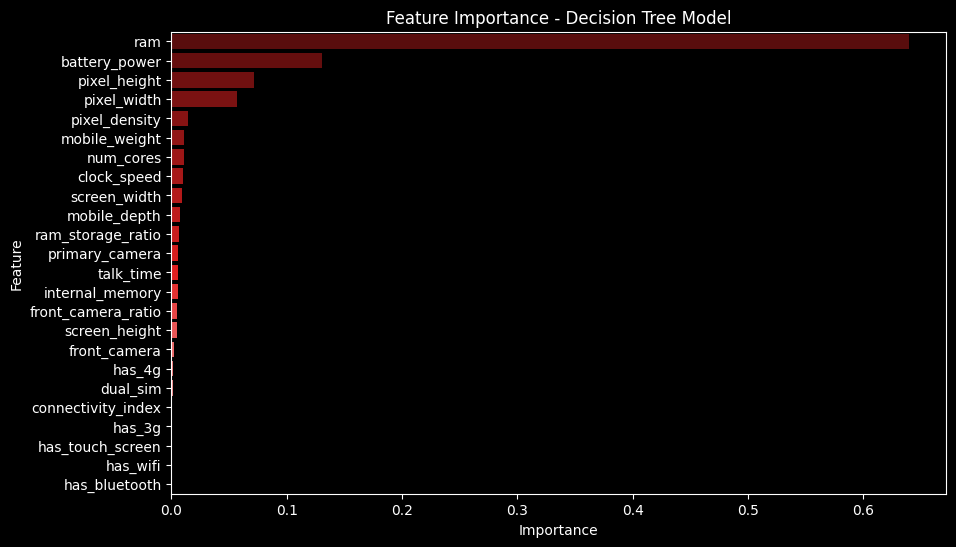

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
# Plot bar chart for decision tree feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=decision_tree_feature_importance_df, palette=custom_palette2)
plt.title('Feature Importance - Decision Tree Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig('feature_importance_decision_tree.png')
plt.show()
files.download('feature_importance_decision_tree.png')

In [35]:
# Create and train random forest classifier
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_imputed, y_train)

RandomForestClassifier(random_state=42)

In [36]:
# Predict using random forest classifier
y_pred_random_forest = random_forest_model.predict(X_test_imputed)

In [37]:
# Calculate accuracy and display classification report for random forest classifier
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
print(f'\nRandom Forest - Accuracy: {accuracy_random_forest:.4f}')
print(classification_report(y_test, y_pred_random_forest))


Random Forest - Accuracy: 0.8700
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       105
           1       0.85      0.85      0.85        91
           2       0.77      0.82      0.79        92
           3       0.92      0.87      0.89       112

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



In [38]:
# Get feature importance from random forest model
random_forest_feature_importance = random_forest_model.feature_importances_

In [39]:
# Create a DataFrame for random forest feature importance
random_forest_feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': random_forest_feature_importance})
random_forest_feature_importance_df = random_forest_feature_importance_df.sort_values(by='Importance', ascending=False)

<ipython-input-48-a86d72b5ad73>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=random_forest_feature_importance_df, palette=custom_palette2)
<ipython-input-48-a86d72b5ad73>:3: UserWarning: The palette list has more values (25) than needed (24), which may not be intended.
  sns.barplot(x='Importance', y='Feature', data=random_forest_feature_importance_df, palette=custom_palette2)


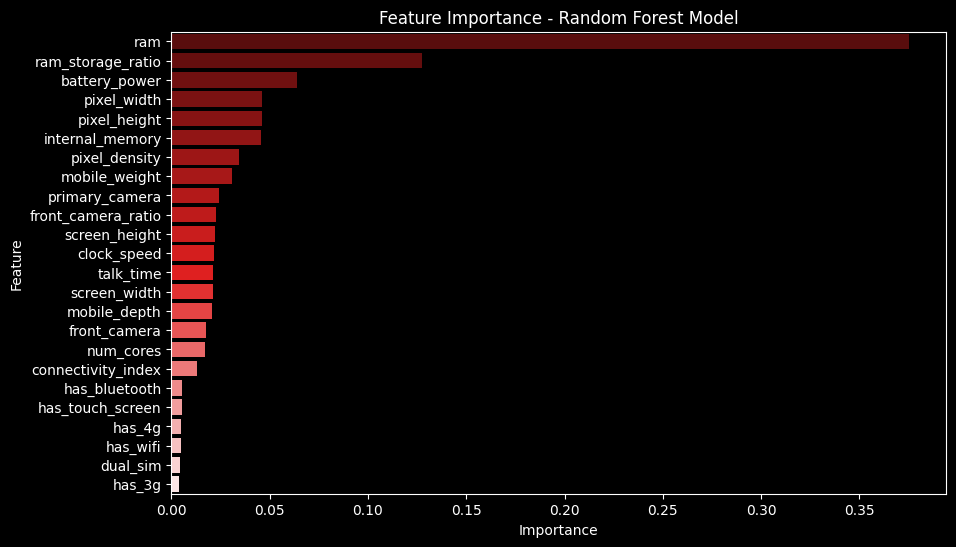

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [48]:
# Plot bar chart for random forest feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=random_forest_feature_importance_df, palette=custom_palette2)
plt.title('Feature Importance - Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig('feature_importance_RFM.png')
plt.show()
files.download('feature_importance_RFM.png')

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
